In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exercise 1 - NMF Clustering (15 points)

## 1) Investigate the given gene expression (GE) dataset and you are asked to cluster the patients/samples based on their GE profile. 

### a) Which unsupervised ML algorithm would you suggest to tackle this task? (1 point) 

**Answer:** Either K-Means or GMM can be mentioned here as hierarchical and agglomerative clustering would take a considerable amount of time to calculate the distance matrix for a large dataset.

### b) Briefly explain the reasoning behind your suggestion. (2 points)

**Answer:** As long as you recognize the fact that the data is huge and would need a faster clustering algorithm to cluster the samples, you will get the full points.

**Note:** That being said, if you answered hierarchical and agglormerative clustering and gave a good reasoning behind your solution for the provided dataset with proofs/code will also reward you the full points.

## 2) Using the nimfa library, carry out NMF on GE data. 

### a) Fit the NMF model in the nimfa library to the GE data and using the cophenetic correlation, estimate the number of clusters (rank) needed to classify the samples in the GE data. (2 points) 

In [ ]:
!pip install nimfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 8.1 MB/s 


In [ ]:
import numpy as np
import nimfa
import pandas as pd
import seaborn as sns
from copy import deepcopy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/AI_Class/Class 2022/Questions/Assignment 6/data.csv", index_col = 0)
data_transpose = data.transpose()

nmf_model = nimfa.Nmf(data_transpose.to_numpy(), max_iter = 50, n_run = 25)

ranks = nmf_model.estimate_rank(rank_range=range(2,10),what=['cophenetic'])
ranks

{2: {'cophenetic': 0.877883840853208, 'n_iter': 50, 'n_run': 10, 'rank': 2},
 3: {'cophenetic': 0.8852255781003702, 'n_iter': 50, 'n_run': 10, 'rank': 3},
 4: {'cophenetic': 0.912160273994938, 'n_iter': 50, 'n_run': 10, 'rank': 4},
 5: {'cophenetic': 0.9070490487523778, 'n_iter': 50, 'n_run': 10, 'rank': 5},
 6: {'cophenetic': 0.848122544056113, 'n_iter': 50, 'n_run': 10, 'rank': 6},
 7: {'cophenetic': 0.8520410586927075, 'n_iter': 50, 'n_run': 10, 'rank': 7},
 8: {'cophenetic': 0.8223928963818782, 'n_iter': 50, 'n_run': 10, 'rank': 8},
 9: {'cophenetic': 0.8814704557802031, 'n_iter': 50, 'n_run': 10, 'rank': 9}}

**Answer:** Based on the cophenetic scores of the ranks, rank of 4, or 4 clusters are present in the dataset.

**Note:** The actual rank in the answer is not as important as the code, as the seed of the NMF model effects the cophenetic score

### b) Visualize the appropriate number of clusters in the consensus matrix using a heatmap. (1 point) 


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


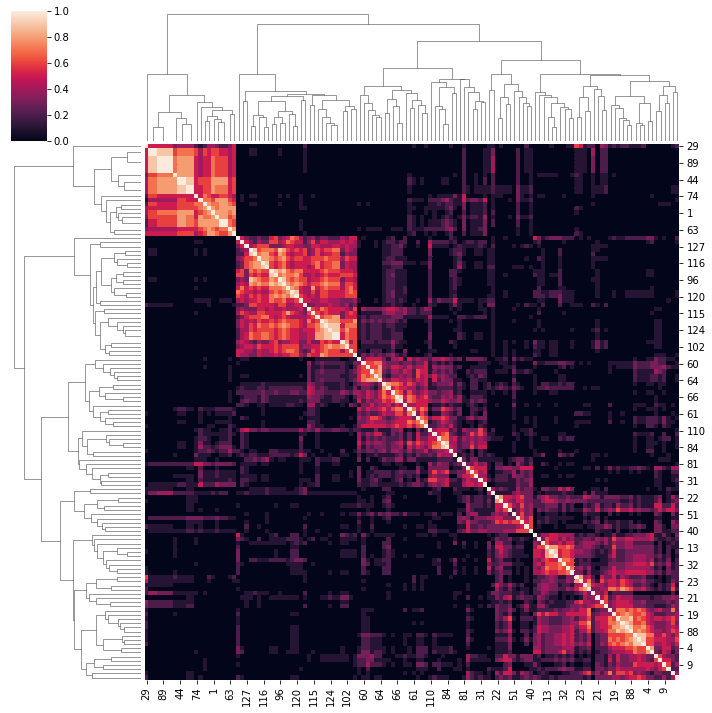

In [ ]:
# Make a copy of the nmf model
nmf_model_ranked = deepcopy(nmf_model)

# Set the rank of the model to the number of clusters
nmf_model_ranked.rank = 4

# Plot the consensus matrix
consensus_matrix = nmf_model_ranked.consensus()
consensus_matrix
cm = sns.clustermap(consensus_matrix)

### c) Using the number of clusters estimated from 2a. carry out K-Means or GMM clustering on the GE data. (1 point) 

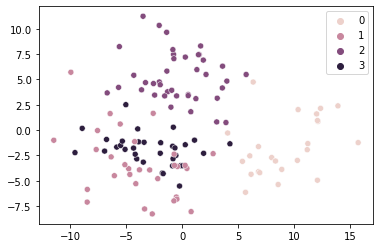

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

# Visualizing KMeans (Not required for the answer)
data_pca = PCA(n_components=2).fit_transform(data)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans.labels_)

### d) Visualize the data using other matrix factorization methods such as PCA and T-SNE and comment on the plot. (1 point) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


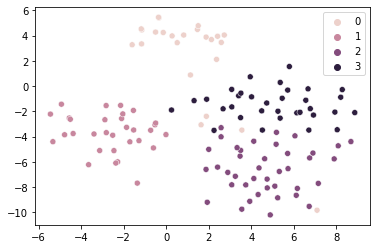

In [ ]:
data_tsne = TSNE(n_components=2).fit_transform(data)

# Visualization of TSNE with Kmeans labels (labels vis not needed for answer)
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=kmeans.labels_)

**Answer:** From the plot, TSNE does seem to produce atleast 3 distinguishable clusters. And rank of 3, as per NMF, had the cophenetic score of 0.88. 

**Additional:** Adding the additional Kmeans labels on the plot allows us to better visualize the 4 clusters and distinguish them 

## 3) Inform yourself about sparse NMF (sNMF) and Non-Negative Matrix Tri-Factorization (NMTF).  

### a) What is the primary difference between NMF, sNMF and NMTF?  (2 points) 


**Answer:** In NMF, assume $V$ to be your data matrix. We factorize $V=WH$, $W\geq0$, $H\geq0$.

In sNMF, we apply a sparsity constraint to W or H by minimizing the equation $$
\left.\min _{W, H \geq 0}\|X-W H\|\right|_{F}+\left.\alpha|| W\left\|\left.\right|_{F}+\beta|| H\right\|\right|_{1}, \alpha, \beta>0
$$


In NMTF, $V$ is factorized into 3 matrices $V=WHS$, where $S$ absorbs the different dimensions of $W$ and $H$, maintaining the accuracy of low-rank matrix representations while satisfying the orthogonality constrains.

### b) Which amongst the 3 NMF would be suitable for the dataset mentioned in question 1? (1 point) 

**Answer:** sNMF is suitable

### c) Briefly explain the reasoning behind your suggestion in question 3b. (2 points) 

**Answer:** If we use our GE data to analyze disease patterns, we want to assume our disease to be rare (and therefore sparse), while it can be the result of different representations of genetic variants in each patients' gene profile. Assuming the rows contain the genetic variants while the columns represent individual patients (and their disease diagnosis), we want to apply a sparsity constraint to the matrix $H$ (representing the columns) while keeping $W$ (representing the rows) unconstrained.

## 4) PCA and NMF are both matrix factorization methods. Write down the corresponding formulas and compare them. What is similar, what is mathematically different? Describe a situation where NMF is favored over PCA. (2 points) 

**Answer:** In NMF, the data matrix $V$ is decomposed into $V=WH$ where $W$ and $H$ are non-negative components whose product approximates the data matrix $W$, while in PCA, assuming the covariance matrix of size $D$x$D$ is $$
\mathbf{C}=\frac{1}{N-1} \mathbf{X}_{0}^{\top} \mathbf{X}_{0}
$$ PCA can be implemented by eigendecomposition of the covariant matrix. This can be done using single value decomposition of data matrix $X=USV^{⊤}$. Applying that to the covariance matrix equation, we get $$
\mathbf{C}=\mathbf{V} \frac{\mathbf{S}^{2}}{N-1} \mathbf{V}^{\top}
$$

NMF is favored over PCA in situations when interpretability is required, since NMF preserves the features as it decomposes the dataset into its non-negative submatrix, while PCA creates new features as combinations of existing ones. (An example where feature preservation is needed is when using gene expression data)

## 5) Have a look at this paper: https://arxiv.org/abs/1512.07548  and explain why k-means clustering can be understood as a matrix factorization problem as well. (2 points) 

**Answer:** The paper showcases the transformation of the classical k-means algorithm into a reduced equation consisting of only $X$ and $Z$ matrices which upon the minimization of the $Z$ matrix could be solved as a matrix factorization method. 

# Exercise 2 - Machine Learning (10 points)

## The type of machine learning (e.g. supervised learning, unsupervised learning, etc.) applied depends on the problem at hand. Assume that we have an Alzheimer's disease (AD) dataset where rows represent 500 participants and columns represent 100 different collected measurements (such as patient characteristics, MRI measurements, and cognitive tests) for each participant. We are provided with diagnoses (healthy, and AD) of participants.

## 1) You are asked as a data scientist to predict the diagnosis status of 20 participants based on the 500 participant data.

### a) What type of machine learning (ML) would you choose for this task? (1 point)


**Answer:** Supervised learning (e.g. logistic regression).

### b) What are the steps you should consider before training your ML algorithm? Hint: List the potential preprocessing steps you would carry out. (2 points)

**Answer:** Preprocessing is an essential task prior to applying any machine learning (ML) technique. It is highly important to check for duplicated and nan entries in a dataset. Often, clinical datasets contain longitudinal measurements, and given the task at hand, one should pay attention to which subset of the dataset should be used for further investigation. Another potential step would be to check how the measurements were collected and preprocess those measurements accordingly. For instance, if the biological sex of the participants was collected as Female/Male, one can convert that information into 0/1 before proceeding with the training of any model. 

## 2) Assuming that we do not have any information about the diagnosis (i.e. no label) of participants, answer the following questions.


### a) What type of machine learning would you use to group the participants based on the collected measurements? (1 point)

**Answer:** Unsupervised learning. For instance, we can use GMM to cluster the participants that have similar measurements.

### b) Based on your answer in part (2a), suggest a model you would use to carry on with this task, and please explain how you can determine the number of groups that separates your participants? (2 points)

**Answer:** GMM, using this clustering method we can potentially group the participants based on all the measurements available to us. As the optimal number of clusters is not known, we can train the model for 2 to 10 number of cluster and calculate the BIC. The model with the lowest BIC would be the preferred model (with respect to the number of clusters).

## 3) Imagine that the shape of our dataset is (100, 1000), mention one pre-processing step that you would take to carry out the tasks (1) and (2)? (1 point)


**Answer:** Using dimensionality reduction technique (e.g. PCA).

## 4) You are asked to investigate the age distribution of healthy versus AD participants, name a visualization plot that can be used in this case, and explain why you think this plot would work best. (1 point)

**Answer:** As the distribution of the measurements is important here, we can use Violin or density plots.